In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from imblearn.over_sampling import SMOTE

import pickle

In [4]:
data_train = pd.read_csv("cleaned_2013_14", low_memory = False);
data_test = pd.read_csv("../hugo/cleaned_2015", low_memory = False);

In [5]:
data_train.head()

,funded_amnt,int_rate,total_pymnt,annual_inc,dti,loan_status,revol_util,term,emp_length_1 year,emp_length_10+ years,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,amnt,paid
0,0.276471,0.0699,6611.69,0.007336,0.373093,Charged Off,0.316,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10400.0,1
1,0.411765,0.1239,17392.37,0.010004,0.300825,Fully Paid,0.290,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.0,0
2,0.195588,0.1366,2281.98,0.006269,0.870468,Charged Off,0.919,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7650.0,1
3,0.252941,0.1366,9973.43,0.008804,0.645411,Fully Paid,0.594,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9600.0,0
4,0.600735,0.1559,25512.20,0.008110,0.462366,Fully Paid,0.762,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21425.0,0


In [6]:
data_train.loc[data_train.loan_status == 'Fully Paid', 'paid'] = 0

In [7]:
data_train.head()

,funded_amnt,int_rate,total_pymnt,annual_inc,dti,loan_status,revol_util,term,emp_length_1 year,emp_length_10+ years,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,amnt,paid
0,0.276471,0.0699,6611.69,0.007336,0.373093,Charged Off,0.316,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10400.0,1
1,0.411765,0.1239,17392.37,0.010004,0.300825,Fully Paid,0.290,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.0,0
2,0.195588,0.1366,2281.98,0.006269,0.870468,Charged Off,0.919,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7650.0,1
3,0.252941,0.1366,9973.43,0.008804,0.645411,Fully Paid,0.594,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9600.0,0
4,0.600735,0.1559,25512.20,0.008110,0.462366,Fully Paid,0.762,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21425.0,0


In [4]:
data_test.columns == data_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [5]:
data_test = data_test.dropna()

In [10]:
(data_train.tail())

,funded_amnt,int_rate,total_pymnt,annual_inc,dti,loan_status,revol_util,term,emp_length_1 year,emp_length_10+ years,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,amnt,paid
351752,0.441176,0.1016,20472.71080,0.010938,0.542636,Fully Paid,0.547,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16000.0,0
351753,0.500000,0.1875,23671.21954,0.007003,0.587147,Fully Paid,0.821,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18000.0,0
351754,0.470588,0.1212,20341.41999,0.020675,0.638660,Fully Paid,0.578,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17000.0,0
351755,0.897059,0.1212,37730.03399,0.026277,0.345336,Fully Paid,0.799,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31500.0,0
351756,0.794118,0.0790,31540.56308,0.010804,0.646662,Fully Paid,0.682,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28000.0,0


In [6]:
def split_data(df, cols):
    x = df.drop(cols, axis = 1)
    y = df.paid
    return x, y

cols_to_drop_training = ['loan_status', 'paid', 'amnt', 'total_pymnt']
x_train_initial, y_train_initial = split_data(data_train, cols_to_drop_training)
x_test, y_test = split_data(data_test, cols_to_drop_training)

In [7]:
sm = SMOTE(random_state=1, ratio = 1.0)
x_train, y_train = sm.fit_sample(x_train_initial, y_train_initial)

In [8]:
x_train.shape

(353866, 44)

In [ ]:
#create a function to take advantage of sklearn make_pipeline
#pipeline adds second order terms and interaction terms to X_train and then fits model
def rf_model(x, y, d):
    model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    RandomForestClassifier(max_features = 100, max_depth = d, n_estimators = 100))
    model.fit(x, y)
    return model

rf_complex = rf_model(x_train, y_train, 10)

In [9]:
with open('Random_Forest_Model_100features.pkl', 'rb') as file:  
    rf_complex = pickle.load(file)

In [10]:
def create_df(data_1, data_2, penal = 0.5):
    df = pd.DataFrame(data_1)
    
    df['int_rate'] = data_2['int_rate']
    df['amnt'] = data_2['amnt']
    df['total_pymnt'] = data_2['total_pymnt']
    df['term'] = data_2['term']
    df['ROI'] = (((1 + df['int_rate'])*(1-df['proba']))+(df['proba']*drr*penal))-1

    df['Real_ROI'] = df['amnt']*(((df['total_pymnt']/df['amnt'])**(1/df['term']))-1)
    df['annualized_amnt'] = df['amnt']*(1/df['term'])
    
    return df

In [11]:
distress = data_train[data_train.paid == 1]
drr = (np.sum(distress.total_pymnt)/np.sum(distress.amnt))**(1/np.mean(distress.term))
print(drr)

0.8972755113514147


In [12]:
train_data = {'proba' : rf_complex.predict_proba(x_train)[:, 1], 'true_val' : y_train}
test_data = {'proba' : rf_complex.predict_proba(x_test)[:, 1], 'true_val' : y_test}

df_train = create_df(train_data, data_train)
df_test =  create_df(test_data, data_test)

In [13]:
baseline_train = np.mean(df_train.ROI)
baseline_test = np.mean(df_test.ROI)
print(baseline_train, baseline_test)
alpha_low = 0
alpha_high = -np.inf

-0.15573513135086037 -0.12289348717807039


In [14]:
loans_to_buy_train = df_train[(df_train.ROI > alpha_low*baseline_train) & (df_train.ROI < alpha_high*baseline_train)]
loans_to_buy_test = df_test[(df_test.ROI > alpha_low*baseline_test) & (df_test.ROI < alpha_high*baseline_test)]

In [15]:
def return_performance(df_sub, df_main):
    perf_subset = np.sum(df_sub.Real_ROI)/np.sum(df_sub.annualized_amnt)
    perf_mainset = np.sum(df_main.Real_ROI)/np.sum(df_main.annualized_amnt)
    return (perf_subset, perf_mainset, perf_subset - perf_mainset)

In [16]:
training_set_performance = return_performance(loans_to_buy_train, df_train)
testing_set_performance = return_performance(loans_to_buy_test, df_test)

In [17]:
print(training_set_performance)
print(testing_set_performance)

(0.0855455469672995, 0.04896587539218422, 0.03657967157511528)
(0.05642919341189416, -0.012916755208969084, 0.06934594862086324)


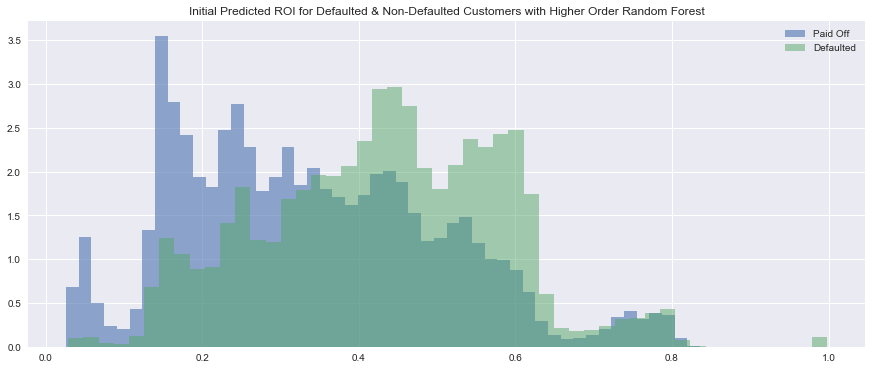

In [18]:
fig = plt.figure(figsize=(15,6));
ax = plt.subplot(1,1,1);

ax.hist(df_test.loc[df_test.true_val == 0,'proba'], density = True, bins = 50, label='Paid Off', alpha=0.6);
ax.hist(df_test.loc[df_test.true_val == 1,'proba'], density = True, bins = 50, label='Defaulted', alpha=0.5);
ax.set_title('Initial Predicted ROI for Defaulted & Non-Defaulted Customers with Higher Order Random Forest')
ax.legend(loc='best')

plt.show()

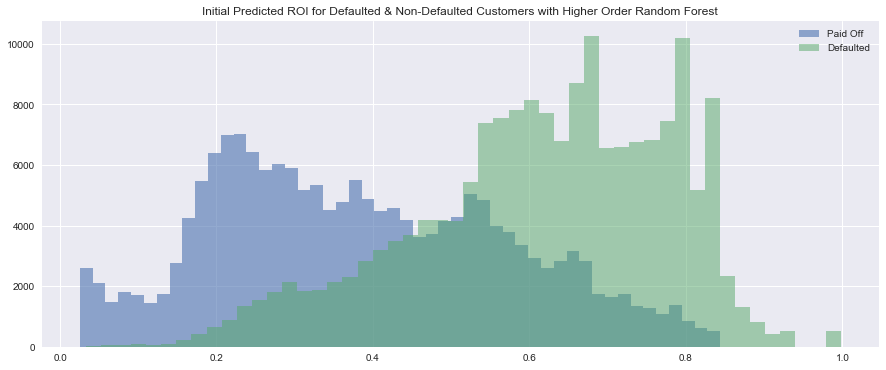

In [19]:
fig = plt.figure(figsize=(15,6));
ax = plt.subplot(1,1,1);

ax.hist(df_train.loc[df_train.true_val == 0,'proba'], bins = 50, label='Paid Off', alpha=0.6);
ax.hist(df_train.loc[df_train.true_val == 1,'proba'], bins = 50, label='Defaulted', alpha=0.5);
ax.set_title('Initial Predicted ROI for Defaulted & Non-Defaulted Customers with Higher Order Random Forest')
ax.legend(loc='best')

plt.show()

/Users/hugoramambason/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


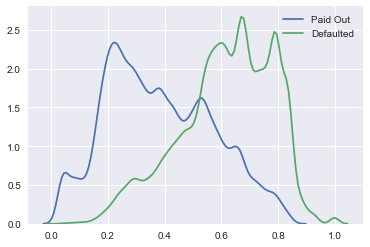

In [20]:
sns.kdeplot(df_train.loc[df_train.true_val == 0,'proba'], label = 'Paid Out');
sns.kdeplot(df_train.loc[df_train.true_val == 1,'proba'], label = 'Defaulted');

/Users/hugoramambason/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


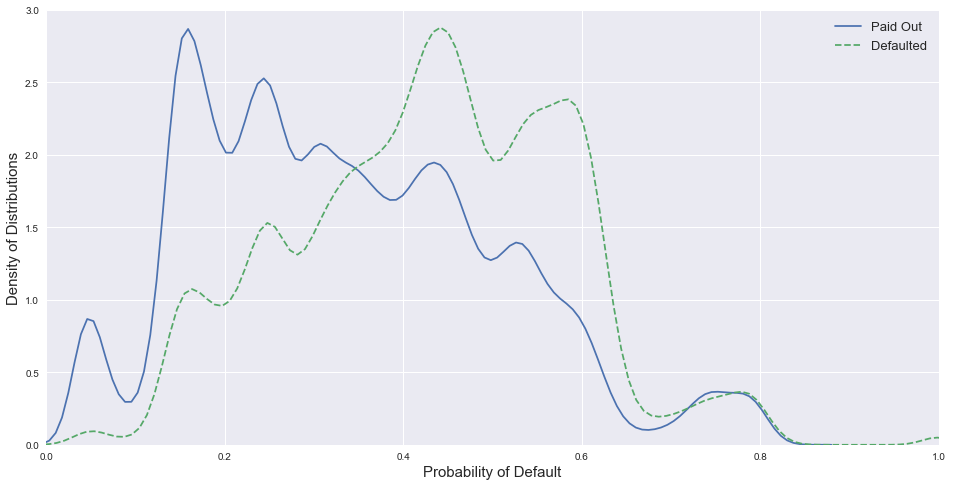

In [21]:
sns.set(rc={'figure.figsize':(16,8)})
sns.kdeplot(df_test.loc[df_test.true_val == 0,'proba'], label = 'Paid Out');
sns.kdeplot(df_test.loc[df_test.true_val == 1,'proba'], label = 'Defaulted', linestyle='--');
plt.ylim(0, 3)
plt.xlim(0, 1);
plt.xlabel('Probability of Default', size = 15);
plt.ylabel('Density of Distributions', size = 15);
plt.legend(prop={'size': 13});
plt.savefig('default_probability_distribution.png', bbox_inches='tight')

/Users/hugoramambason/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hugoramambason/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/hugoramambason/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


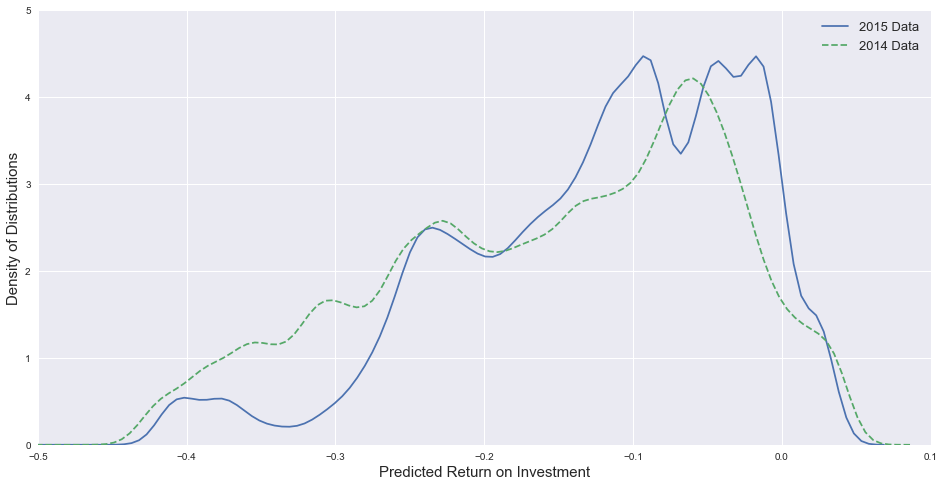

In [90]:
sns.kdeplot(df_test['ROI'], label = '2015 Data');
sns.kdeplot(df_train['ROI'], label = '2014 Data', linestyle='--');
plt.ylim(0, 5)
plt.xlim(-0.5, 0.1);
plt.xlabel('Predicted Return on Investment', size = 15);
plt.ylabel('Density of Distributions', size = 15);
plt.legend(prop={'size': 13});
plt.savefig('ROI_distribution.png', bbox_inches='tight')

In [126]:
# Dump the trained decision tree classifier with Pickle
#decision_tree_pkl_filename = 'Random_Forest_Model_100features.pkl'
# Open the file to save as pkl file
#decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
#pickle.dump(rf_complex, decision_tree_model_pkl)
# Close the pickle instances
#decision_tree_model_pkl.close()